<a href="https://colab.research.google.com/github/YASsMeN1997/YASsMeN1997-MNIST-Handwritten-Digits-classification-using-Neural-Network/blob/main/MNIST_Handwritten_Digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



importing the Dependencies




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras  # keras develop by google // pytorch develop by facebook
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the MNIST data from keras.datasets

In [2]:
 (x_train,y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# printng shape of training and testing data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


traning data = 60,000 images

test data = 10,000 images

image dimension --> 28 x 28

Grayscale image --> 1 channel


In [5]:
# printing the 10th image
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train[10].shape

(28, 28)

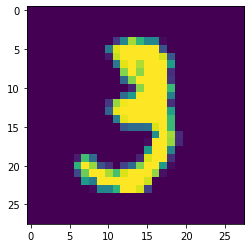

3


In [7]:
# displaying the image
plt.imshow(x_train[10])
plt.show()

# prnting the corresponding label
print(y_train[10])

image labels

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


here is the 10th digits, we can use as it or we can do one hot encoding

i will use the labels as it [0,1,2,3,4,5,6,7,8,9]

In [11]:
# scalling the values or normalization
x_train=x_train/255
x_test=x_test/255

In [12]:
# printing the image after scalling
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

building the neural network

In [13]:

# setting the layers of the NN
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                       
] 
)

In [14]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [15]:
# training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

training data accuracy = 98%

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710


test data accuracy = 97 %

In [17]:
x_test.shape

(10000, 28, 28)

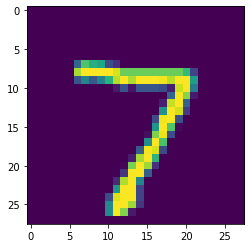

7


In [18]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [19]:
y_pred=model.predict(x_test)

In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
# printing the first image in predicted images
y_pred[0]

array([3.5130084e-03, 6.7106444e-01, 6.6638464e-01, 8.5868883e-01,
       6.2501094e-05, 9.0813637e-04, 4.0907306e-08, 9.9999774e-01,
       1.3417095e-02, 6.5949798e-02], dtype=float32)

model.predict() gives the probabilty of each class for that data point 

In [22]:
# printing the corresponding label
print('label value is :',np.argmax(y_pred[0]))

label value is : 7


so, the prediction is correct as we see

In [23]:
# converting the prediction probabilties to class label for all the data points
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred)
print('//////////////////////////////////////////////////////////////////////')
print(y_pred_label)

[[3.5130084e-03 6.7106444e-01 6.6638464e-01 ... 9.9999774e-01
  1.3417095e-02 6.5949798e-02]
 [1.4623702e-03 9.8551810e-01 9.9999803e-01 ... 8.7179070e-10
  9.9594283e-01 2.8698874e-09]
 [3.2803416e-04 9.9889880e-01 1.9822419e-02 ... 1.7416507e-02
  8.2349467e-01 3.1207800e-03]
 ...
 [7.6076623e-07 2.1074546e-05 1.1165320e-04 ... 5.3507298e-02
  2.6697814e-03 5.0617886e-01]
 [3.9582705e-05 3.1402707e-04 3.5408437e-03 ... 6.9005787e-03
  9.9133873e-01 6.4516068e-04]
 [1.0095924e-02 1.2965620e-02 4.6259880e-02 ... 3.3845839e-07
  1.4659762e-04 5.2905436e-10]]
//////////////////////////////////////////////////////////////////////
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4

y_test ---> true label

y_pred_label ---> predicted label

confusion matrix

In [24]:
con_mx=confusion_matrix(y_test,y_pred_label)

In [25]:
print(con_mx)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'predicted_labels')

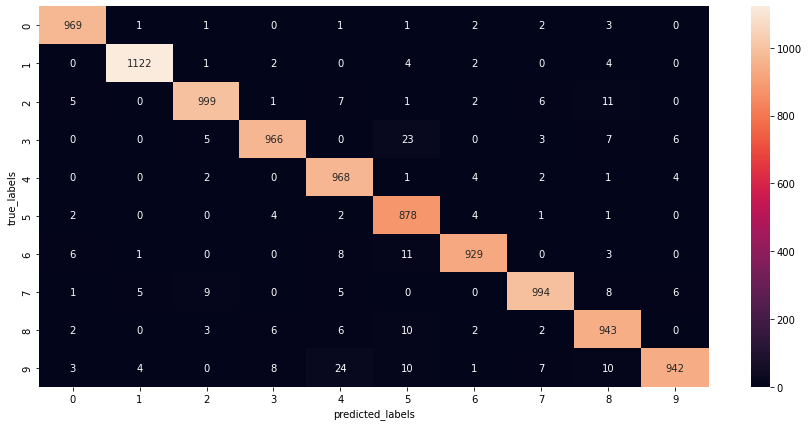

In [26]:
# using heatmap to show confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(con_mx , annot=True , fmt='d' )
plt.ylabel('true_labels')
plt.xlabel('predicted_labels')

**building a predictive system**

please enter the path of the image : /content/eight.PNG


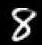

the handwritten digit is recognized as  8


In [34]:
# take the path of image from the user
input_image_path=input('please enter the path of the image : ')
# convert the image to numpy array
input_image=cv2.imread(input_image_path)
# displaying the image
cv2_imshow(input_image)
#print(input_image.shape)
# convert image to greyscale
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
#print(grayscale.shape)
# resize the image to 28 x 28
image_resize=cv2.resize(grayscale,(28,28))
#print(image_resize.shape)
cv2_imshow(image_resize)
# image scalling
image_resize=image_resize/255
# image reshape 
image_reshape=np.reshape(image_resize,[1,28,28])
# image prediction
input_pred=model.predict(image_reshape)
#print(input_pred)
input_pred_label=np.argmax(input_pred)
print('the handwritten digit is recognized as ',input_pred_label)